This notebook will generate the final figures used in the paper. Throughout the previous notebooks data has been saved to `FinalFigures/data_for_figures/` and will be used here.

I'll use the R packages ggplot2 and [cowplot](https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html) to do this.

In [2]:
#load packages, you will need to install these if you don't have them already
library(cowplot)
library(tidyverse)
library(jcolors)
library(forcats)
library(ggforce)
library(Hmisc)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.7
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ cowplot::ggsave() masks ggplot2::ggsave()
✖ dplyr::lag()      masks stats::lag()
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



# Figure 1

In [246]:
f <- seq(0.0, 1.0, 0.01)
dnds <- 2 * f + 1
dfpos <- data_frame(f = f, dnds = dnds, s = "Positive selection")

dnds <- -2 * f + 1
dfneg <- data_frame(f = f, dnds = dnds, s = "Negative selection")

df <- bind_rows(dfpos, dfneg)

gdnds <- df %>%
    ggplot(aes(x = f, y = dnds, group = s, col = s)) +
    geom_line(size = 2) +
    theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
    geom_hline(yintercept = 1.0, lty = 2) +
    scale_y_continuous(breaks = c(1.0)) +
    xlab("Frequency") +
    ylab("dN/dS") +
    scale_color_manual(values = c( "dodgerblue4", "firebrick4")) +
    theme(legend.position=c(0.1, 0.8)) +
    theme(legend.title=element_blank())

dnds <- 0.5 * f + 1
dfpos1 <- data_frame(f = f, dnds = dnds, s = "Low s")
dnds <- 2.0 * f + 1
dfpos2 <- data_frame(f = f, dnds = dnds, s = "Medium s")
dnds <- 3.0 * f + 1
dfpos3 <- data_frame(f = f, dnds = dnds, s = "High s")

df <- bind_rows(dfpos1, dfpos2, dfpos3) %>%
    mutate(s = factor(s, levels = c("Low s", "Medium s", "High s")))

gdifferents <- df %>%
    ggplot(aes(x = f, y = dnds, group = s, col = s)) +
    geom_line(size = 2) +
    geom_text(data = filter(df, f == last(f)), 
              aes(label = s, x = f - 0.05, y = 0.85 * dnds, color = s)) + 
    theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
    geom_hline(yintercept = 1.0, lty = 2) +
    scale_y_continuous(breaks = c(1.0), limits = c(-1, 4)) +
    xlab("Frequency") +
    ylab("dN/dS") +
    scale_color_manual(values = c( "firebrick1", "firebrick3", "firebrick4")) +
    theme(legend.position="none")

#create figures leaving space to insert cartoons
figure1 <- plot_grid(NULL, gdnds, gdifferents, ncol = 3, rel_widths = c(1, 0.7, 0.7),
                         labels = c("a", "b", "c"))
save_plot("FinalFigures/Figure1temp.pdf", figure1, base_height = 3.5, base_width = 15)

# Figure 2

In [247]:
dfnon <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_nonsense.csv", col_types = cols())
dfmiss <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_missense.csv", col_types = cols())

dfnon.gene <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_nonsense_pergene.csv", col_types = cols())
dfmiss.gene <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_missense_pergene.csv", col_types = cols())

dfnon.gene.neutral <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_nonsense_pergene_neutral.csv", col_types = cols())
dfmiss.gene.neutral <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_missense_pergene_neutral.csv", col_types = cols())

dfneutral <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_allmutations_neutral.csv", col_types = cols())

dfsim <- read.csv("FinalFigures/data_for_figures/stemcell_simulation_examplefits.csv")
dfpower <- read_csv("FinalFigures/data_for_figures/stemcell_simulation_power.csv", col_types = cols())

I'll first summarise the data.

In [248]:
dfmiss %>%
group_by(patient) %>%
summarise(delta = first(deltafit), lambda = first(lambdarfit)) %>%
summarise(deltam = mean(delta), 
          deltacilow = quantile(delta, 0.025),
          deltacihigh = quantile(delta, 0.975),
          lambdam = mean(lambda), 
          lambdacilow = quantile(lambda, 0.025),
          lambdacihigh = quantile(lambda, 0.975))

deltam,deltacilow,deltacihigh,lambdam,lambdacilow,lambdacihigh
0.003886797,0.00193703,0.005582967,7.463084,0.9021228,21.3828


In [249]:
dfnon %>%
group_by(patient) %>%
summarise(delta = first(deltafit), lambda = first(lambdarfit)) %>%
summarise(deltam = mean(delta), 
          deltacilow = quantile(delta, 0.025),
          deltacihigh = quantile(delta, 0.975),
          lambdam = mean(lambda), 
          lambdacilow = quantile(lambda, 0.025),
          lambdacihigh = quantile(lambda, 0.975),
          lambdamin = min(lambda),
          lambdamax = max(lambda))

deltam,deltacilow,deltacihigh,lambdam,lambdacilow,lambdacihigh,lambdamin,lambdamax
0.02158948,0.0079982,0.03150032,2.557272,1.233189,4.942636,1.189603,5.028137


In [250]:
textdf <- dfsim %>%
    filter(deltatrue > 0.3, lambdartrue == 0.25) %>%
    group_by(deltatrue) %>%
    mutate(deltag = paste0(deltatrue)) %>%
     mutate(label = paste("list(Delta[input] == ", deltatrue,", Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")")) %>%
    distinct(deltatrue, deltag, label) %>%
    mutate(y = ifelse(deltatrue == 0.4, 6.5, 8.6))

gsim <- dfsim %>%
    filter(row_number() %% 5 == 0) %>%
    filter(deltatrue > 0.3, lambdartrue == 0.25) %>%
    filter(row_number() %% 5 == 0) %>%
    #filter(A < 15.0) %>%
    mutate(deltag = paste0(deltatrue)) %>%
    ggplot(aes(x = A)) +
    geom_point(aes(y = dnds,  group = deltag, fill = deltag, col = deltag), alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit, group = deltag, fill = deltag, col = deltag), alpha = 0.3, size = 1) +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq, group = deltag, fill = deltag, col = deltag), alpha = 0.1) +
    geom_text(data = textdf, aes(label = label, y = y, col = deltag), x = 15.0, size = 3, parse = TRUE) +
    xlab("Clone Area") +
    ylab("dN/dS") +
    ggtitle("Simulated cohort") +
    theme(legend.position = "none") +
    scale_color_jcolors(palette = "pal6")

Warning message:
“Ignoring unknown aesthetics: fill”

In [251]:
library(Hmisc)

g1 <- dfpower %>%
    mutate(nsamples = factor(paste0(nsamples), 
    levels = Cs(5, 8, 10, 25, 50, 100, 250))) %>%
    ggplot(aes(x = nsamples, y = delta)) +
    #geom_violin(fill = "steelblue4") +
    geom_sina(col = "steelblue4") +
    geom_boxplot(width = 0.3, alpha = 0.7, col = "steelblue4") +
    ylim(c(0, 1.0)) +
    geom_hline(yintercept = 0.25, lty = 2) +
    xlab("Number of mutations") +
    ylab(expression(paste("Inferred  ", Delta)))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- dfpower %>%
    mutate(nsamples = factor(paste0(nsamples), 
    levels = Cs(5, 8, 10, 25, 50, 100, 250))) %>%
    ggplot(aes(x = nsamples, y = rsq)) +
    geom_sina(col = "steelblue4") +
    geom_boxplot(width = 0.3, alpha = 0.7, col = "steelblue4") +
    ylim(c(0, 1.0)) +
    xlab("Number of mutations") +
    ylab(expression(R^2)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

figure2top <- plot_grid(gsim, g1, g2, ncol = 3, labels = c("a", "b", "c"))

Warning message:
“Removed 10 rows containing non-finite values (stat_sina).”Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10 rows containing non-finite values (stat_sina).”Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”

In [252]:
textdf <- dfmiss.gene.neutral %>%
    filter( gene == "MUC17") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g1 <- dfmiss.gene.neutral %>%
    filter(gene == "MUC17") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    ggtitle("PD31182 - NOTCH1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE) +
    ylim(c(0, 2))

In [253]:
#make some individual plots

textdf <- dfnon.gene %>%
    filter(	patient == "PD30274", gene == "FAT1") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g2 <- dfnon.gene %>%
    filter(patient == "PD30274", gene == "FAT1") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD30274 - FAT1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE)

textdf <- dfneutral %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3),")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 0) %>%
    distinct(y, deltafit, label)
g1 <- dfneutral %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "cornsilk3") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "cornsilk3", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS") +
    ggtitle("All Neutral genes") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE) +
    ylim(c(0, 2))

textdf <- dfmiss.gene %>%
    filter(	patient == "PD30988", gene == "NOTCH1") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g2 <- dfmiss.gene %>%
    filter(patient == "PD30988", gene == "NOTCH1") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    ggtitle("PD31182 - NOTCH1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE)

textdf <- dfmiss.gene %>%
    filter(	patient == "PD30273", gene == "TP53") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g3 <- dfmiss.gene %>%
    filter(patient == "PD30273", gene == "TP53") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    ggtitle("PD30273 - TP53") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE)

textdf <- dfnon.gene %>%
    filter(	patient == "PD31182", gene == "NOTCH1") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g4 <- dfnon.gene %>%
    filter(patient == "PD31182", gene == "NOTCH1") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "black", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD31182 - NOTCH1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 2.5, size = 5, parse = TRUE)

figure2bottom <- plot_grid(g1, g2, g3, g4, labels = c("d", "e", "f", "g"), ncol = 4)

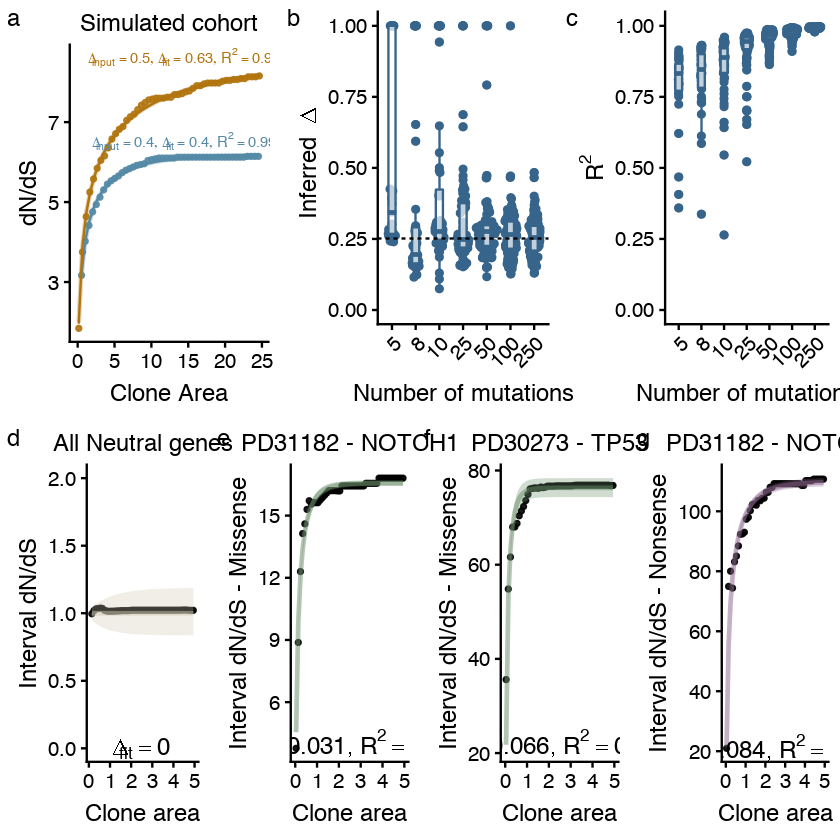

In [254]:
#combine plots together
figure2 <- plot_grid(figure2top, figure2bottom, ncol = 1)
save_plot("FinalFigures/Figure2.pdf", figure2, base_height = 7, base_width = 12)
figure2

Parsed with column specification:
cols(
  name = col_character(),
  mle = col_double(),
  cilow = col_double(),
  cihigh = col_double(),
  medianbin = col_double(),
  vafbin = col_character(),
  nmutations = col_integer()
)


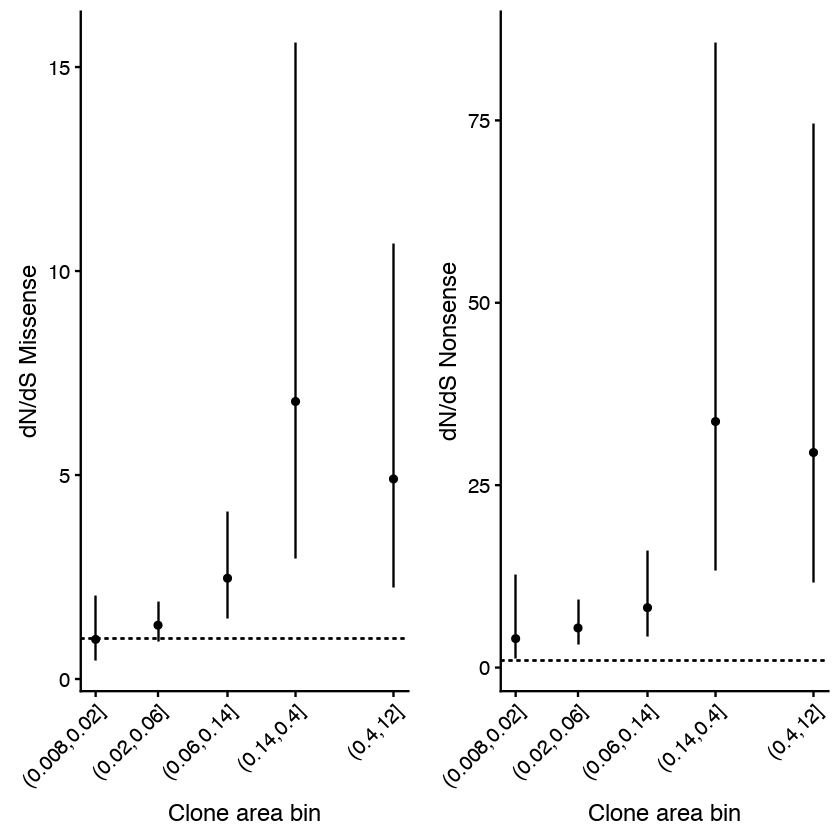

In [255]:

dfbins <- read_csv("FinalFigures/data_for_figures/PD31182_bins.csv") %>%
mutate(A = medianbin)

g1 <- dfbins %>%
    filter(name == "wmis") %>%
    ggplot(aes(y = mle, x = A)) +
    geom_point() +
    geom_hline(yintercept = 1.0, lty = 2) +
    geom_linerange(aes(ymin = cilow, ymax = cihigh)) +
    scale_x_log10(breaks = unique(dfbins$medianbin), labels = unique(dfbins$vafbin)) +
    xlab("Clone area bin") + ylab("dN/dS Missense") +
    geom_hline(yintercept = 1.0, lty = 2) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- dfbins %>%
    filter(name == "wnon") %>%
    ggplot(aes(y = mle, x = A)) +
    geom_point() +
    geom_hline(yintercept = 1.0, lty = 2) +
    geom_linerange(aes(ymin = cilow, ymax = cihigh)) +
    scale_x_log10(breaks = unique(dfbins$medianbin), labels = unique(dfbins$vafbin)) +
    xlab("Clone area bin") + ylab("dN/dS Nonsense") +
    geom_hline(yintercept = 1.0, lty = 2) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g <- plot_grid(g1, g2)
save_plot(filename = "FinalFigures/FigureS1.pdf", g, base_height = 6, base_width = 10)
g

# Figure 3 & Supplementary Figures .. 

In [256]:
dfnon <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_nonsense.csv", col_types = cols())
dfmiss <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_missense.csv", col_types = cols())

dfnon.gene <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_nonsense_pergene.csv", col_types = cols())
dfmiss.gene <- read_csv("FinalFigures/data_for_figures/esophagus_dnds_missense_pergene.csv", col_types = cols())

In [257]:
dfdnds.gene <- read_csv("data/esophagus/dnds_patient_genes_combined.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  gene_name = col_character(),
  n_syn = col_integer(),
  n_mis = col_integer(),
  n_non = col_integer(),
  n_spl = col_integer(),
  n_ind = col_integer(),
  patient = col_character()
)
See spec(...) for full column specifications.


In [258]:
#summarise the per gene per patient fits

dfcombined <- bind_rows(mutate(dfmiss.gene, mutationtype = "Missense"),
                        mutate(dfnon.gene, mutationtype = "Nonsense"))

library(ggforce)

DFresults <- dfcombined %>%
    group_by(gene, mutationtype, deltafit, nmutations, deltafitlq, deltafituq) %>%
    summarise(rsq = first(rsq)) %>%
    filter(rsq > 0.6, nmutations > 7) %>%
    group_by(gene, mutationtype) %>% mutate(n = n()) %>% filter(n > 1)

g1del <- DFresults %>%
    filter(mutationtype == "Missense") %>%
    group_by(gene) %>%
    mutate(s = median(deltafit)) %>%
    ungroup() %>%
    ggplot(aes(x = fct_reorder(gene, s, .desc = TRUE), y = deltafit)) +
    geom_point(col = "firebrick") +
    geom_hline(yintercept = 0.0, lty = 2) +
    geom_boxplot(alpha = 0.1, width = 0.3, fill = "firebrick") + #scale_y_log10() +
    xlab("") +
    ylab(expression(paste(Delta))) +
    coord_flip() + ggtitle("Missense")

g2del <- DFresults %>%
    filter(mutationtype == "Nonsense") %>%
    group_by(gene) %>%
    mutate(s = median(deltafit)) %>%
    ungroup() %>%
    ggplot(aes(x = fct_reorder(gene, s, .desc = TRUE), y = deltafit)) +
    geom_point(col = "deepskyblue4") +
    geom_hline(yintercept = 0.0, lty = 2) +
    geom_boxplot(alpha = 0.1, width = 0.3, fill = "deepskyblue4") + #scale_y_log10() +
    xlab("") +
    ylab(expression(paste(Delta))) +
    coord_flip() + ggtitle("Nonsense")

geneplot <- plot_grid(g1del, g2del, align = T, labels = c("a", "b"))

In [259]:
DFresults <- dfcombined %>%
    group_by(gene, mutationtype, deltafit, nmutations, deltafitlq, deltafituq) %>%
    summarise(rsq = first(rsq)) %>%
    filter(rsq > 0.6, nmutations > 7) %>%
    group_by(gene, mutationtype) %>% mutate(n = n())

DFEmiss <- DFresults %>%
    filter(mutationtype == "Missense") %>%
    mutate(genelab = ifelse(gene == "TP53" | gene == "NOTCH1", gene, "Other genes")) %>%
    mutate(genelab = factor(genelab, levels = c("TP53", "NOTCH1", "Other genes"))) %>%
    ggplot(aes(x = deltafit, fill = genelab)) +
    geom_histogram(bins = 25, position  = "stack", color = "white", size = 0.2) +
    ggtitle("Missense") +
    xlim(c(0, 0.1)) +
    xlab(expression(paste(Delta))) +
    ylab("Counts") +
    theme(legend.position = c(0.7, 0.8)) +
    scale_fill_jcolors(pal = "pal7",  name = "")

DFEnon <- DFresults %>%
    filter(mutationtype == "Nonsense") %>%
    mutate(genelab = ifelse(gene == "TP53" | gene == "NOTCH1", gene, "Other genes")) %>%
    mutate(genelab = factor(genelab, levels = c("TP53", "NOTCH1", "Other genes"))) %>%
    ggplot(aes(x = deltafit, group = genelab, fill = genelab, col = genelab)) +
    geom_histogram(bins = 25, position = "stack", color = "white", size = 0.2) +
    scale_fill_jcolors(pal = "pal7") +
    #scale_color_jcolors(pal = "pal7") +
    ggtitle("Nonsense") +
    xlim(c(0, 0.1)) +
    xlab(expression(paste(Delta))) +
    ylab("Counts") +
    theme(legend.position = "none")

DFE <- plot_grid(DFEmiss, DFEnon, labels = c("c", "d"))

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

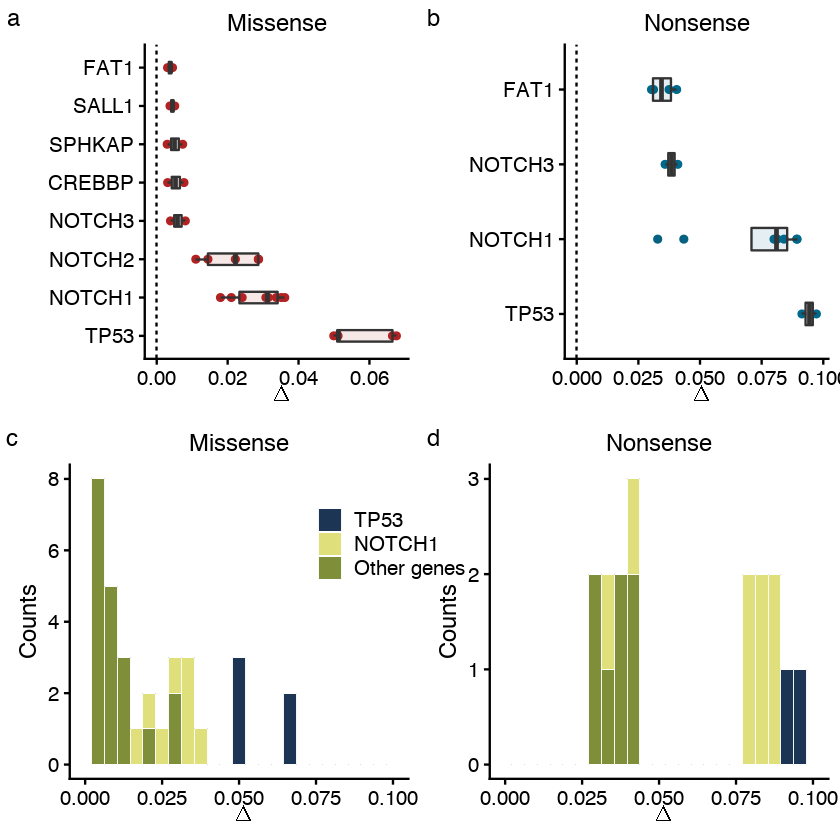

In [260]:
figure3 <- plot_grid(geneplot, DFE, ncol = 1)
save_plot("FinalFigures/Figure3.pdf", figure3, base_height = 7, base_width = 10)
figure3

In [261]:
#summarize per gene values

DFresults %>%
filter(mutationtype == "Missense") %>%
group_by(gene) %>%
summarise(deltam = mean(deltafit),
          deltacilow = quantile(deltafit, 0.025),
          deltacihigh = quantile(deltafit, 0.975)) %>%
arrange(desc(deltam)) %>% print()

DFresults %>%
filter(mutationtype == "Nonsense") %>%
group_by(gene) %>%
summarise(deltam = mean(deltafit),
          deltacilow = quantile(deltafit, 0.025),
          deltacihigh = quantile(deltafit, 0.975)) %>%
arrange(desc(deltam)) %>% print()

DFresults %>%
ungroup() %>%
filter(mutationtype == "Missense", gene %in% c("CREBBP", "FAT1", "NOTCH2", "PIK3CA")) %>%
summarise(deltam = mean(deltafit),
          deltacilow = quantile(deltafit, 0.025),
          deltacihigh = quantile(deltafit, 0.975),
           deltamin = min(deltafit),
          deltamax = max(deltafit)) %>%
arrange(desc(deltam)) %>% print()

DFresults %>%
ungroup() %>%
filter(mutationtype == "Nonsense", gene %in% c("CREBBP", "FAT1", "NOTCH2", "PIK3CA")) %>%
summarise(deltam = mean(deltafit),
          deltacilow = quantile(deltafit, 0.025),
          deltacihigh = quantile(deltafit, 0.975),
           deltamin = min(deltafit),
          deltamax = max(deltafit)) %>%
arrange(desc(deltam)) %>% print()


# A tibble: 14 x 4
   gene      deltam deltacilow deltacihigh
   <chr>      <dbl>      <dbl>       <dbl>
 1 TP53    0.0572     0.0500      0.0675  
 2 NOTCH1  0.0288     0.0185      0.0359  
 3 NOTCH2  0.0210     0.0114      0.0287  
 4 BAI3    0.0105     0.0105      0.0105  
 5 PIK3CA  0.00803    0.00803     0.00803 
 6 KMT2C   0.00763    0.00763     0.00763 
 7 NOTCH3  0.00597    0.00399     0.00796 
 8 CREBBP  0.00539    0.00320     0.00757 
 9 SPHKAP  0.00513    0.00306     0.00720 
10 SALL1   0.00441    0.00378     0.00504 
11 FAT1    0.00375    0.00309     0.00441 
12 SCN11A  0.00288    0.00288     0.00288 
13 KMT2D   0.000679   0.000679    0.000679
14 ERBB4  -0.00106   -0.00106    -0.00106 
# A tibble: 5 x 4
  gene   deltam deltacilow deltacihigh
  <chr>   <dbl>      <dbl>       <dbl>
1 TP53   0.0943     0.0915      0.0971
2 NOTCH1 0.0726     0.0347      0.0893
3 NOTCH3 0.0384     0.0360      0.0409
4 FAT1   0.0349     0.0304      0.0403
5 KMT2D  0.0329     0.0329      0.0329
# 

In [262]:
DFresults %>%
filter(mutationtype == "Missense", gene %in% c("CREBBP", "FAT1", "NOTCH2", "PIK3CA"))

gene,mutationtype,deltafit,nmutations,deltafitlq,deltafituq,rsq,n
CREBBP,Missense,0.003083676,10,0.002853976,0.003313375,0.8190240,2
CREBBP,Missense,0.007686718,13,0.007441560,0.007931876,0.8685083,2
FAT1,Missense,0.003059496,18,0.002835662,0.003283331,0.7765913,2
FAT1,Missense,0.004443094,22,0.004275244,0.004610943,0.8903581,2
NOTCH2,Missense,0.011021731,26,0.010656269,0.011387193,0.8128925,5
NOTCH2,Missense,0.014436779,16,0.014329832,0.014543726,0.6269621,5
NOTCH2,Missense,0.022178837,56,0.022130046,0.022227628,0.9802602,5
NOTCH2,Missense,0.028656768,25,0.028608220,0.028705317,0.9833255,5
NOTCH2,Missense,0.028726135,16,0.028579918,0.028872351,0.8552974,5
PIK3CA,Missense,0.008026665,10,0.007261962,0.008791368,0.9062848,1


In [263]:
# plot all per patient per gene fits

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Missense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gmiss <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Missense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

#save_plot("FinalFigures/Figure3SX.pdf", g3, base_height = 12, base_width = 12)

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 9, mutationtype == "Nonsense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gnon <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Nonsense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

g <- plot_grid(gnon, gmiss, ncol = 1)

save_plot("FinalFigures/FigureS3.pdf", g, base_height = 24, base_width = 12)

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

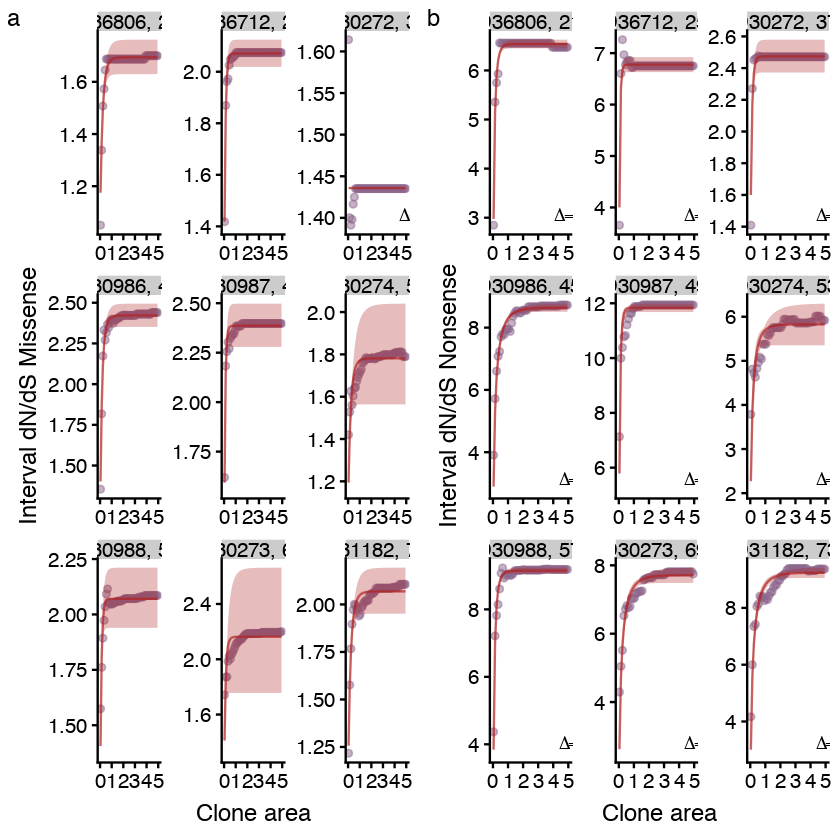

In [264]:
# plot all per patient fits

textdfmiss <- dfmiss %>%
    mutate(p = paste0(patient, ", ", Age2),
    p = fct_reorder(p, Age2)) %>%
    mutate(label = paste("list(Delta == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")")) %>%
    distinct(p, label)

gmiss <- dfmiss %>%
    mutate(p = paste0(patient, ", ", Age2),
    p = fct_reorder(p, Age2)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.5, col = "plum4") +
    geom_line(aes(y = dndsfit), alpha = 0.7, col = "firebrick") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "firebrick", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS Missense") +
    geom_text(data = textdfmiss,
        mapping = aes(x = -Inf, y = -Inf, label = label),
        hjust   = -0.4,
        vjust   = -0.5, parse = T) +
    facet_wrap(~p, scales = "free", ncol = 3)

textdfnon <- dfnon %>%
    mutate(p = paste0(patient, ", ", Age2),
    p = fct_reorder(p, Age2)) %>%
    mutate(label = paste("list(Delta == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")")) %>%
    distinct(p, label)

gnon <- dfnon %>%
    mutate(p = paste0(patient, ", ", Age2),
    p = fct_reorder(p, Age2)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.5, col = "plum4") +
    geom_line(aes(y = dndsfit), alpha = 0.7, col = "firebrick") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "firebrick", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS Nonsense") +
    geom_text(data = textdfnon,
        mapping = aes(x = -Inf, y = -Inf, label = label),
        hjust   = -0.4,
        vjust   = -0.5, parse = T) +
    facet_wrap(~p, scales = "free", ncol = 3)

g <- plot_grid(gmiss, gnon, ncol = 2, labels = c("a", "b"))

save_plot("FinalFigures/FigureS2.pdf", g, base_height = 8, base_width = 16)

g

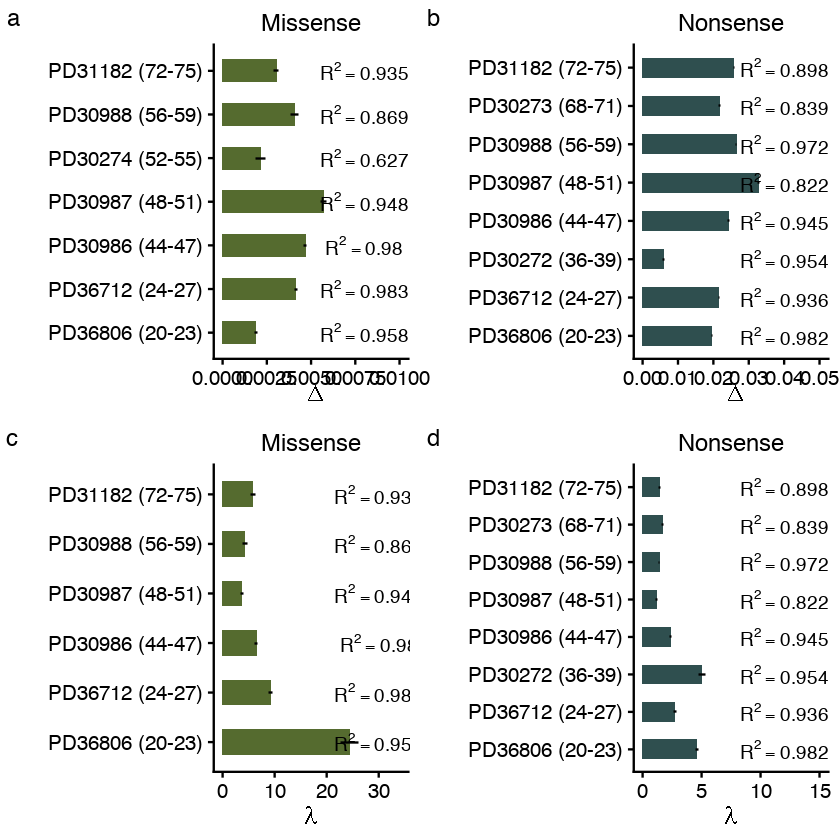

In [265]:
#summarise per patient global Delta values

nonsenseperpatient <- dfnon %>% 
    distinct(patient, Age, Age2, deltafit, deltafitlq, deltafituq, rsq) %>%
    mutate(xlab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    filter(rsq > 0.6) %>%
    ggplot(aes(x = fct_reorder(xlab, Age2), y = deltafit)) +
    geom_bar(stat = "identity", fill = "darkslategrey", width = 0.5) +
    geom_text(aes(label = barlab), y = 0.04, parse = T) + 
    geom_linerange(aes(ymin = deltafitlq, ymax = deltafituq)) +
    coord_flip() +
    ylim(c(0, 0.05)) +
    xlab("") +
    ylab(expression(Delta)) +
    ggtitle("Nonsense")
    
missenseperpatient <- dfmiss %>% 
    distinct(patient, Age, Age2, deltafit, deltafitlq, deltafituq, rsq) %>%
    mutate(xlab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    filter(rsq > 0.6) %>%
    ggplot(aes(x = fct_reorder(xlab, Age2), y = deltafit)) +
    geom_bar(stat = "identity", fill = "darkolivegreen", width = 0.5) +
    geom_text(aes(label = barlab), y = 0.008, parse = T) + 
    geom_linerange(aes(ymin = deltafitlq, ymax = deltafituq)) +
    coord_flip() +
    ylim(c(0, 0.01)) +
    xlab("") +
    ylab(expression(Delta)) +
    ggtitle("Missense")

patientplot <- plot_grid(missenseperpatient, nonsenseperpatient, align = T, labels = c("a", "b"))

#summarise per patient global lambda values
nonsenseperpatient <- dfnon %>% 
    distinct(patient, Age, Age2, lambdarfit, lambdarfitlq, lambdarfituq, rsq) %>%
    mutate(xlab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    filter(rsq > 0.7) %>%
    ggplot(aes(x = fct_reorder(xlab, Age2), y = lambdarfit)) +
    geom_bar(stat = "identity", fill = "darkslategrey", width = 0.5) +
    geom_linerange(aes(ymin = lambdarfitlq, ymax = lambdarfituq)) + 
    geom_text(aes(label = barlab), y = 12.0, parse = T) + 
    coord_flip() +
    ylim(c(0, 15.0)) +
    xlab("") +
    ylab(expression(lambda)) +
    ggtitle("Nonsense")
    
missenseperpatient <- dfmiss %>% 
    distinct(patient, Age, Age2, lambdarfit, lambdarfitlq, lambdarfituq, rsq) %>%
    mutate(xlab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    filter(rsq > 0.7) %>%
    ggplot(aes(x = fct_reorder(xlab, Age2), y = lambdarfit)) +
    geom_bar(stat = "identity", fill = "darkolivegreen", width = 0.5) +
    geom_linerange(aes(ymin = lambdarfitlq, ymax = lambdarfituq)) + 
    geom_text(aes(label = barlab), y = 30.0, parse = T) + 
    coord_flip() +
    ylim(c(0, 34.0)) +
    xlab("") +
    ylab(expression(lambda)) +
    ggtitle("Missense")

patientplot2 <- plot_grid(missenseperpatient, nonsenseperpatient, align = T, labels = c("c", "d"))

finalplot <- plot_grid(patientplot, patientplot2, ncol = 1)

save_plot("FinalFigures/FigureS3.pdf", finalplot, base_height = 7, base_width = 10)

finalplot

In [266]:
# plot all per patient per gene fits

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 9, mutationtype == "Missense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gmiss <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Missense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

#save_plot("FinalFigures/Figure3SX.pdf", g3, base_height = 12, base_width = 12)

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 9, mutationtype == "Nonsense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gnon <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Nonsense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

g <- plot_grid(gnon, gmiss, ncol = 1)

save_plot("FinalFigures/FigureS4.pdf", g, base_height = 24, base_width = 12)

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

In [267]:
glambda <- dfcombined %>%
    distinct(patient, Age, Age2, deltafit, deltafitlq, deltafituq, lambdarfit,
             lambdarfitlq, lambdarfituq, rsq, mutationtype, gene, nmutations) %>%
    mutate(plab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    mutate(plab = fct_reorder(plab, Age2)) %>%
    filter(rsq > 0.6, lambdarfit < 40.0, nmutations > 7) %>%
    ggplot(aes(x = gene, y = lambdarfit, fill = mutationtype, group = mutationtype)) +
    geom_bar(stat = "identity", position = position_dodge2(width = 0.9, preserve = "single"), width = 0.5) +
    geom_linerange(aes(ymin = lambdarfitlq, ymax = lambdarfituq), 
                       position = position_dodge2(width = 0.5)) +
    coord_flip() +
    xlab("") +
    ylab(expression(lambda)) +
    facet_wrap(~plab, drop = TRUE, scales = "free") +
    scale_fill_jcolors(palette = "default") +
    theme(legend.position = "none") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

gdelta <- dfcombined %>%
    distinct(patient, Age, Age2, deltafit, deltafitlq, deltafituq, lambdarfit,
             lambdarfitlq, lambdarfituq, rsq, mutationtype, gene, nmutations) %>%
    mutate(plab = paste0(patient, " (", Age, ")"),
          barlab = paste0("R^{2}==",round(rsq, 3))) %>%
    mutate(plab = fct_reorder(plab, Age2)) %>%
    filter(rsq > 0.6, nmutations > 7) %>%
    ggplot(aes(x = gene, y = deltafit, fill = mutationtype)) +
    geom_bar(stat = "identity", position = position_dodge2(width = 0.9, preserve = "single"), width = 0.5) +
    geom_linerange(aes(ymin = deltafitlq, ymax = deltafituq),
                  position = position_dodge2(width = 0.5)) +
    coord_flip() +
    xlab("") +
    ylab(expression(Delta)) +
    facet_wrap(~plab, drop = TRUE, scales = "free") +
    scale_fill_jcolors(palette = "default") +
    theme(legend.title = element_blank()) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

save_plot("FinalFigures/FigureS5.pdf", plot_grid(glambda, gdelta, ncol = 2), base_height = 10, base_width = 20) 

# Supplementary figure 5 - Skin data

In [3]:
dfnon <- read_csv("FinalFigures/data_for_figures/skin_dnds_nonsense.csv", col_types = cols())
dfmiss <- read_csv("FinalFigures/data_for_figures/skin_dnds_missense.csv", col_types = cols())

dfnon.gene <- read_csv("FinalFigures/data_for_figures/skin_dnds_nonsense_pergene.csv", col_types = cols())
dfmiss.gene <- read_csv("FinalFigures/data_for_figures/skin_dnds_missense_pergene.csv", col_types = cols())

In [5]:
head(dfnon.gene)

dnds,A,dndsfit,dndsfitlq,dndsfituq,deltafit,lambdarfit,deltafitlq,lambdarfitlq,deltafituq,lambdarfituq,sedelta,selambda,rsq,patient,Age,gene,nmutations
33.958133,0.03,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2
8.795458,0.08,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2
4.496670,0.13,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2
2.815188,0.18,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2
2.406673,0.23,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2
2.343778,0.28,4.811204,4.811204,4.811204,0.02350886,0.02760404,-0.1046534,-0.4085632,0.1516711,0.4637712,0.1281622,0.4361672,-1.109489e-08,PD13634,73,SALL1,2


In [28]:
#make some individual plots from sking data with good fits

textdf <- dfnon %>%
    filter(	patient == "PD18003") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 0.5) %>%
    distinct(y, deltafit, label)
g1 <- dfnon %>%
    filter(	patient == "PD18003") %>%
    mutate(p = paste0(patient, ", ", Age)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "plum4", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.5, col = "firebrick") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "firebrick", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD18003 - All genes") +
    geom_text(data = textdf, aes(label = label, y = y), x = 1.0, size = 5, parse = TRUE)

textdf <- dfmiss %>%
    filter(	patient == "PD18003") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 0.5) %>%
    distinct(y, deltafit, label)
g2 <- dfmiss %>%
    filter(	patient == "PD18003") %>%
    mutate(p = paste0(patient, ", ", Age)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "plum4", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.5, col = "firebrick") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "firebrick", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    ggtitle("PD18003 - All genes") +
    geom_text(data = textdf, aes(label = label, y = y), x = 1.0, size = 5, parse = TRUE)

textdf <- dfnon %>%
    filter(	patient == "PD20399") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 0.5) %>%
    distinct(y, deltafit, label)
g3 <- dfnon %>%
    filter(	patient == "PD20399") %>%
    mutate(p = paste0(patient, ", ", Age)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "plum4", size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.5, col = "firebrick") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "firebrick", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD20399 - All genes") +
    geom_text(data = textdf, aes(label = label, y = y), x = 1.0, size = 5, parse = TRUE)


textdf <- dfmiss.gene %>%
    filter(	patient == "PD18003", gene == "TP53") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g4 <- dfnon.gene %>%
    filter(patient == "PD20399", gene == "NOTCH1") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.5, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD20399 - NOTCH1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 1.0, size = 5, parse = TRUE)

textdf <- dfmiss.gene %>%
    filter(	patient == "PD18003", gene == "NOTCH1") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
g5 <- dfmiss.gene %>%
    filter(patient == "PD18003", gene == "NOTCH1") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.5, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    ggtitle("PD18003 - NOTCH1") +
    geom_text(data = textdf, aes(label = label, y = y), x = 1.0, size = 5, parse = TRUE)

DFresults <- dfcombined %>%
    group_by(gene, mutationtype, deltafit, nmutations, deltafitlq, deltafituq) %>%
    summarise(rsq = first(rsq)) %>%
    filter(rsq > 0.6, nmutations > 7) %>%
    group_by(gene, mutationtype) %>% mutate(n = n())

DFEmiss <- DFresults %>%
    filter(mutationtype == "Missense") %>%
    mutate(genelab = ifelse(gene == "TP53" | gene == "NOTCH1" | gene == "NOTCH2", gene, "Other genes")) %>%
    mutate(genelab = factor(genelab, levels = c("TP53", "NOTCH1", "NOTCH2", "Other genes"))) %>%
    ggplot(aes(x = deltafit, fill = genelab)) +
    geom_histogram(bins = 25, position  = "stack", color = "white", size = 0.2) +
    ggtitle("Missense") +
    xlim(c(0, 0.1)) +
    xlab(expression(paste(Delta))) +
    ylab("Counts") +
    theme(legend.position = c(0.5, 0.8)) +
    scale_fill_jcolors(pal = "pal7",  name = "")

In [29]:
g <- plot_grid(g1, g2, g3, g4, g5, DFEmiss, ncol = 3, labels = c("a", "b", "c", "d", "e", "f"))

save_plot("FinalFigures/FigureS6.pdf", g, base_height = 7, base_width = 10)

Warning message:
“Removed 8 rows containing missing values (geom_bar).”

In [27]:
# summarize data
dfmiss.gene %>%
    filter(	patient == "PD18003", gene == "TP53") %>%
    summarise(d = first(deltafit), dl = first(deltafitlq), du = first(deltafituq)) %>%
    print()

dfmiss.gene %>%
    filter(	patient == "PD18003", gene == "NOTCH1") %>%
    summarise(d = first(deltafit), dl = first(deltafitlq), du = first(deltafituq)) %>%
    print()

# A tibble: 1 x 3
        d      dl      du
    <dbl>   <dbl>   <dbl>
1 0.00542 0.00508 0.00576
# A tibble: 1 x 3
       d     dl     du
   <dbl>  <dbl>  <dbl>
1 0.0149 0.0148 0.0150


In [272]:
dfnon.gene %>%
    filter(	patient == "PD18003", gene == "NOTCH1") %>%
    summarise(d = first(deltafit), dl = first(deltafitlq), du = first(deltafituq))

d,dl,du
0.04566759,0.04524633,0.04608885


In [22]:
DFresults %>%
    filter(mutationtype == "Missense")

gene,mutationtype,deltafit,nmutations,deltafitlq,deltafituq,rsq,n
APOB,Missense,0.0002615038,37,0.0002059288,0.0003170789,0.6174605,1
CR2,Missense,0.0082765679,15,0.0079431038,0.0086100321,0.8004247,2
CR2,Missense,0.0181580202,9,0.0176781628,0.0186378775,0.6784829,2
EPHA2,Missense,0.0023122620,10,0.0020658140,0.0025587099,0.7170815,1
ERBB4,Missense,0.0146650522,14,0.0143660165,0.0149640879,0.8524875,1
FAT4,Missense,0.0004698695,51,0.0004260174,0.0005137215,0.8205892,1
FGFR3,Missense,0.0063720077,13,0.0059977455,0.0067462700,0.7732749,1
FLG2,Missense,0.0049450983,24,0.0045747192,0.0053154775,0.7044585,2
FLG2,Missense,0.0075970264,16,0.0071261820,0.0080678707,0.6995861,2
KCNH5,Missense,0.0037635750,14,0.0033176346,0.0042095155,0.6092951,1


In [17]:

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Missense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gmiss <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 7, mutationtype == "Missense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "plum4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "plum4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Missense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

#save_plot("FinalFigures/Figure3SX.pdf", g3, base_height = 12, base_width = 12)

textdf <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 4, mutationtype == "Nonsense") %>%
    mutate(label = paste("list(Delta[fit] == ", round(deltafit, 3), ",R^{2}==",round(rsq, 3) ,")"),
          y1 = min(dnds), y2 = min(dndsfit),
          y = floor(min(y1, y2)) + 1) %>%
    distinct(y, deltafit, label)
gnon <- dfcombined %>%
    filter(rsq > 0.6, nmutations > 4, mutationtype == "Nonsense") %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, size = 1) +
    geom_line(aes(y = dndsfit), alpha = 0.5, size = 1.0, col = "darkseagreen4") +
    geom_ribbon(aes(ymin = dndsfitlq, ymax = dndsfituq), fill = "darkseagreen4", alpha = 0.3) +
    xlab("Clone area") +
    ylab("Interval dN/dS - Nonsense") +
    facet_wrap(gene~patient, scale = "free_y")
    geom_text(data = textdf, aes(label = label, y = y), x = 3.0, size = 5, parse = TRUE)

g <- plot_grid(gnon, gmiss, ncol = 1)

save_plot("FinalFigures/FigureS10X.pdf", g, base_height = 24, base_width = 12)

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

mapping: y = ~y, label = ~label 
geom_text: parse = TRUE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

# Figure 4 & Supplementary Figure 7

In [273]:
getdndsplot <- function(dfdnds, baseline, mutname, muttype, plottitle = "", 
                        ylabel = "dN/dS", ylims = c(0.8, 2.0), pointsize = 2, linesize = 1){

    dftemp <- dfdnds %>%
        left_join(., baseline, by = "name") %>%
        mutate(mle = mle - (dnds_bl - 1),
              cilow = cilow - (dnds_bl - 1),
              cihigh = cihigh - (dnds_bl - 1)) %>%
        filter(name == mutname, mutationtype ==  muttype)
    out <- dfdnds %>%
    filter(name == mutname, mutationtype ==  muttype) %>%
    ggplot(aes(x = clonality, y = mle, ymin = cilow, ymax = cihigh, col = clonality)) +
    geom_point(size = pointsize) +
    geom_linerange(size = linesize) +
    geom_hline(yintercept = 1.0, lty = 2) +
    background_grid(major = "xy", minor = "none") +
    ylab(ylabel) + xlab("") + ggtitle(plottitle) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(ylims)
    return(out)
}

In [ ]:
head(dfsubc)

In [274]:
dfsubc <- read_csv("FinalFigures/data_for_figures/TCGAmutations_for_dnds_clonality.csv", col_types = cols())
baseline <- read_csv("FinalFigures/data_for_figures/dNdS_baseline.csv", col_types = cols())
dfdnds <- read_csv("FinalFigures/data_for_figures/TCGA_dnds_clonality.csv", col_types = cols())
dfdnds.cancertype <- read_csv("FinalFigures/data_for_figures/TCGA_dnds_clonality_percancertype.csv", col_types = cols())

Warning message:
“Removed 5629 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

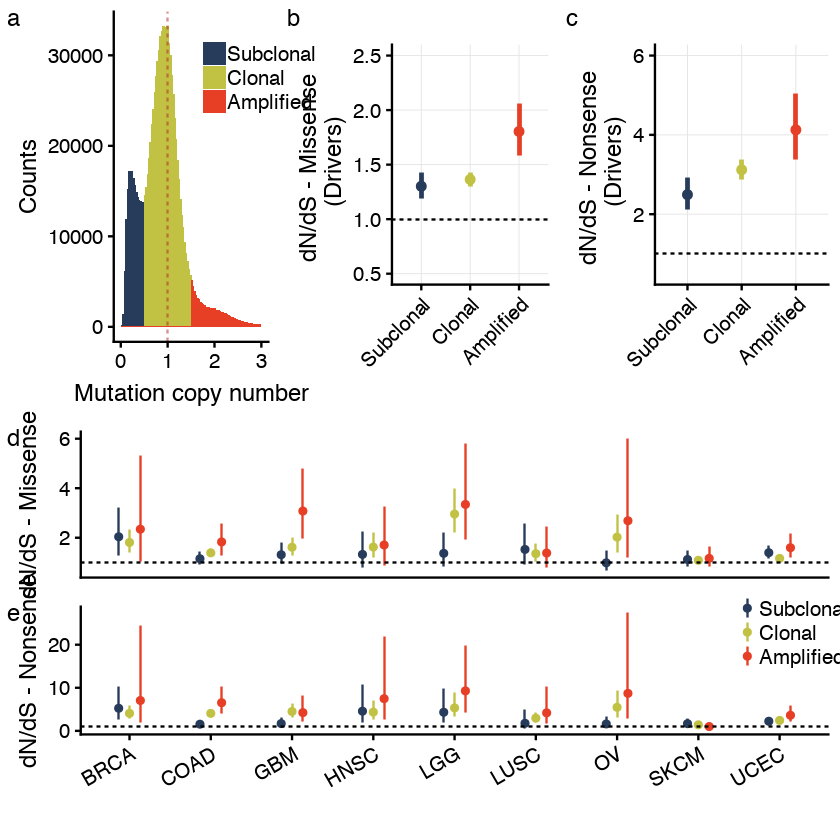

In [275]:
gMCN <- dfsubc %>%
    na.omit() %>%
    mutate(clonality = factor(clonality, 
                              levels = c("Subclonal", "Clonal", "Amplified"))) %>%
    ggplot(aes(x = MCN, fill = clonality)) +
    geom_histogram(bins = 100, position = "identity") +
    geom_vline(xintercept = 1.0, lty = 2, col = "firebrick", alpha = 0.5) +
    xlim(c(0, 3.0)) +
    theme(legend.position = c(0.5, 0.8), legend.title = element_blank()) +
    xlab("Mutation copy number") + ylab("Counts") + 
    scale_fill_jcolors(palette = "pal9") #+scale_color_jcolors(palette = "pal9")

dfdnds <- dfdnds %>%
    mutate(clonality = factor(clonality, 
                              levels = c("Subclonal", "Clonal", "Amplified")))

gdndsdriver <- getdndsplot(dfdnds, baseline, "wmis", "drivers", "Driver mutations", "dN/dS - Missense \n (Drivers)", ylims = c(0.5, 2.5)) +
                scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")
gdndsdrivernon <- getdndsplot(dfdnds, baseline, "wnon", "drivers", "Driver mutations", "dN/dS - Nonsense \n (Drivers)", ylims = c(0.5, 6.0)) +
                scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")

gclonality <- cowplot::plot_grid(gMCN, gdndsdriver, gdndsdrivernon, ncol = 3, labels = c("a", "b", "c"))

g1 <- dfdnds.cancertype %>%
    mutate(clonality = factor(clonality, 
                                  levels = c("Subclonal", "Clonal", "Amplified"))) %>%
    filter(!cancertype %in% c("THCA", "PRAD", "KIRC")) %>%
    filter(mutationtype == "drivers", name == "wmis") %>%
    ggplot(aes(x = cancertype, y = mle, ymin = cilow, ymax = cihigh, col = clonality)) +
    geom_point(position = position_dodge(0.4)) +
    geom_linerange(position = position_dodge(0.4)) +
    scale_color_jcolors(palette = "pal9") +
    #scale_y_log10() +
    xlab("") +
    ylab("dN/dS - Missense") +
    geom_hline(yintercept = 1.0, lty = 2) +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    theme(legend.position = "none") +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

g2 <- dfdnds.cancertype %>%
    mutate(clonality = factor(clonality, 
                                  levels = c("Subclonal", "Clonal", "Amplified"))) %>%
    filter(!cancertype %in% c("THCA", "PRAD", "KIRC")) %>%
    filter(mutationtype == "drivers", name == "wnon") %>%
    ggplot(aes(x = cancertype, y = mle, ymin = cilow, ymax = cihigh, col = clonality)) +
    geom_point(position = position_dodge(0.4)) +
    geom_linerange(position = position_dodge(0.4)) +
    scale_color_jcolors(palette = "pal9") +
    #scale_y_log10() +
    xlab("") +
    ylab("dN/dS - Nonsense") +
    geom_hline(yintercept = 1.0, lty = 2) +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    theme(legend.position = c(0.86, 0.8), legend.title = element_blank())

gpercancer <- plot_grid(g1, g2, ncol = 1, rel_heights = c(1.0, 1.4), align = "v", labels = c("d", "e"))

gclonality <- plot_grid(gclonality, gpercancer, ncol = 1)

save_plot("FinalFigures/Figure4.pdf", gclonality, base_height = 10, base_width = 10)
gclonality

In [276]:
#only include cancer types with at least 100 samples
cancertypes <- dfsubc %>%
    distinct(sampleid, cancertype) %>%
    group_by(cancertype) %>%
    summarise(n = n()) %>%
    filter(n >= 100) %>%
    filter(!cancertype %in% c("THCA", "PRAD")) %>%
    pull(cancertype)

plotlist <- list()
i <- 1

for (ct in cancertypes){
    
    dfdndsct <- dfdnds.cancertype %>%
        filter(cancertype == ct) %>%
        mutate(clonality = factor(clonality, 
                              levels = c("Subclonal", "Clonal", "Amplified")))
    
    gvafall <- dfsubc %>%
        filter(cancertype == ct) %>%
        mutate(clonality = factor(clonality, 
                                  levels = c("Subclonal", "Clonal", "Amplified"))) %>%
        ggplot(aes(x = MCN, fill = clonality)) +
        geom_histogram(bins = 100, position = "identity") +
        geom_vline(xintercept = 1.0, lty = 2, col = "firebrick", alpha = 0.5) +
        xlim(c(0, 3.0)) +
        theme(legend.position = c(0.5, 0.8), legend.title = element_blank()) +
        xlab("Mutation copy number") + ylab("Counts") + 
        scale_fill_jcolors(palette = "pal9") +
        ggtitle(ct)

    
    lim <- round(max(filter(dfdndsct, name == "wmis", mutationtype == "all")$cihigh)) + 0.5
    gdndsdriver <- getdndsplot(dfdndsct, baseline, "wmis", "all", "Driver mutations", "dN/dS - Missense", ylims = c(0.8, lim)) +
                    scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")
    lim <- round(max(filter(dfdndsct, name == "wnon", mutationtype == "all")$cihigh)) + 0.5
    gdndsdrivernon <- getdndsplot(dfdndsct, baseline, "wnon", "all", "Driver mutations", "dN/dS - Nonsense", ylims = c(0.8, lim)) +
                    scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")


    gclonality <- plot_grid(gvafall, gdndsdriver, gdndsdrivernon, ncol = 3)
    
    plotlist[[i]] <- gclonality
    i <- i + 1
}

#save_plot("FinalFigures/FigureS6.pdf", plot_grid(plotlist = plotlist, ncol = 2), base_height = 20,base_width = 20)

plotlist <- list()
i <- 1

for (ct in cancertypes){
    
    dfdndsct <- dfdnds.cancertype %>%
        filter(cancertype == ct) %>%
        mutate(clonality = factor(clonality, 
                              levels = c("Subclonal", "Clonal", "Amplified")))
    
    gvafall <- dfsubc %>%
        filter(cancertype == ct) %>%
        mutate(clonality = factor(clonality, 
                                  levels = c("Subclonal", "Clonal", "Amplified"))) %>%
        ggplot(aes(x = MCN, fill = clonality)) +
        geom_histogram(bins = 100, position = "identity") +
        geom_vline(xintercept = 1.0, lty = 2, col = "firebrick", alpha = 0.5) +
        xlim(c(0, 3.0)) +
        theme(legend.position = c(0.5, 0.8), legend.title = element_blank()) +
        xlab("Mutation copy number") + ylab("Counts") + 
        scale_fill_jcolors(palette = "pal9") +
        ggtitle(ct)

    
    lim <- round(max(filter(dfdndsct, name == "wmis")$cihigh)) + 0.5
    gdndsdriver <- getdndsplot(dfdndsct, baseline, "wmis", "drivers", "Driver mutations", "dN/dS - Missense", ylims = c(0.0, lim)) +
                    scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")
    lim <- round(max(filter(dfdndsct, name == "wnon")$cihigh)) + 0.5
    gdndsdrivernon <- getdndsplot(dfdndsct, baseline, "wnon", "drivers", "Driver mutations", "dN/dS - Nonsense", ylims = c(0.0, lim)) +
                    scale_color_jcolors(palette = "pal9") + theme(legend.position = "none") + ggtitle("")


    gclonality <- plot_grid(gvafall, gdndsdriver, gdndsdrivernon, ncol = 3)
    
    plotlist[[i]] <- gclonality
    i <- i + 1
}

save_plot("FinalFigures/FigureS7.pdf", plot_grid(plotlist = plotlist, ncol = 2), base_height = 20, base_width = 20)


Warning message:
“Removed 209 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 619 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 656 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 219 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 58 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_linerange).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_linerange).”Warning message:
“Removed 166 rows cont

### Figure 5 & Supplementary Figures 7

In [277]:
dfdndsInt <- read_csv("FinalFigures/data_for_figures/IntervalDnDs_tcga.csv", col_types = cols())
dfdndsIntSim <- read_csv("FinalFigures/data_for_figures/cancer_simulation_dnds.csv", col_types = cols())

dfdndsIntpowerSim <- read_csv("FinalFigures/data_for_figures/cancer_simulation_power_dnds.csv", col_types = cols())

mutspergene <- read_csv("FinalFigures/data_for_figures/TCGA_mutation_pergene.csv", col_types = cols())

mutspergenepercancer <- read_csv("FinalFigures/data_for_figures/TCGA_mutation_pergene_percancertype.csv", col_types = cols())

drivers <- read_delim("FinalFigures/data_for_figures/Driver_gene_list_198_Science_Review.txt", delim = "\t", col_types = cols(), col_names = F)

In [278]:
library(forcats)
library(ggforce)
dfplot <- dfdndsIntpowerSim %>%
    group_by(simnum, sample) %>%
    dplyr::summarize(sfit = first(sfit), 
    trues = first(trues), 
    ndrivers = first(ndrivers), 
    npassengers = first(npassengers)) %>%
    mutate(driverspersample = ndrivers / 1000, passengerspersample = npassengers/1000) %>%
    ungroup()

glow <- dfdndsIntpowerSim %>%
    filter(CCF < 0.5) %>%
    filter(simnum == 1, npassengers == 20) %>%
    mutate(trues = paste0(trues)) %>%
    ggplot2::ggplot(ggplot2::aes(x = CCF, y = dnds)) +
    ggplot2::geom_point(size = 0.7, alpha = 0.7) +
    ggplot2::geom_line(ggplot2::aes(y = dndsth), col = "plum4", size = 1.2, alpha = 0.7) +
    ggplot2::ylab("Interval \n dN/dS") + ggplot2::xlab(expression(f[max])) +
    geom_hline(yintercept = 1.0, lty = 2) +
    scale_fill_hue(l=40) +
    background_grid(major = "xy", minor = "none") +
    theme(legend.position="none") +
    ggtitle("# mutations = 20")

ghigh <- dfdndsIntpowerSim %>%
    filter(CCF < 0.5) %>%
    filter(simnum == 1, npassengers == 500) %>%
    mutate(trues = paste0(trues)) %>%
    ggplot2::ggplot(ggplot2::aes(x = CCF, y = dnds)) +
    ggplot2::geom_point(size = 0.7, alpha = 0.7) +
    ggplot2::geom_line(ggplot2::aes(y = dndsth), col = "plum4", size = 1.2, alpha = 0.7) +
    ggplot2::ylab("Interval \n dN/dS") + ggplot2::xlab(expression(f[max])) +
    geom_hline(yintercept = 1.0, lty = 2) +
    scale_fill_hue(l=40) +
    background_grid(major = "xy", minor = "none") +
    theme(legend.position="none") +
    ggtitle("# mutations = 500")

gsummary <- dfplot %>%
    mutate(sample = fct_reorder(as.factor(as.character(npassengers)), npassengers)) %>%
    ggplot(aes(y = sfit, x = sample)) +
    geom_boxplot(alpha = 0.5) +
    geom_sina(col = "plum4", alpha = 0.8, size = 0.7) +
    geom_hline(yintercept = 0.25, lty = 2, col = "firebrick") +
    #geom_hline(yintercept = 0.3, lty = 2, alpha = 0.5) +
    #geom_hline(yintercept = 0.2, lty = 2, alpha = 0.5) +
    xlab("Number of synonymous mutations") +
    ylab("Estimated s")

gpower <- plot_grid(glow, ghigh, gsummary, ncol = 3, rel_widths = c(1,1,1.5), labels = c("a", "b", "c"))

#save_plot("FinalFigures/FigureS8.pdf", gpower, base_height = 3.5, base_width = 10)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

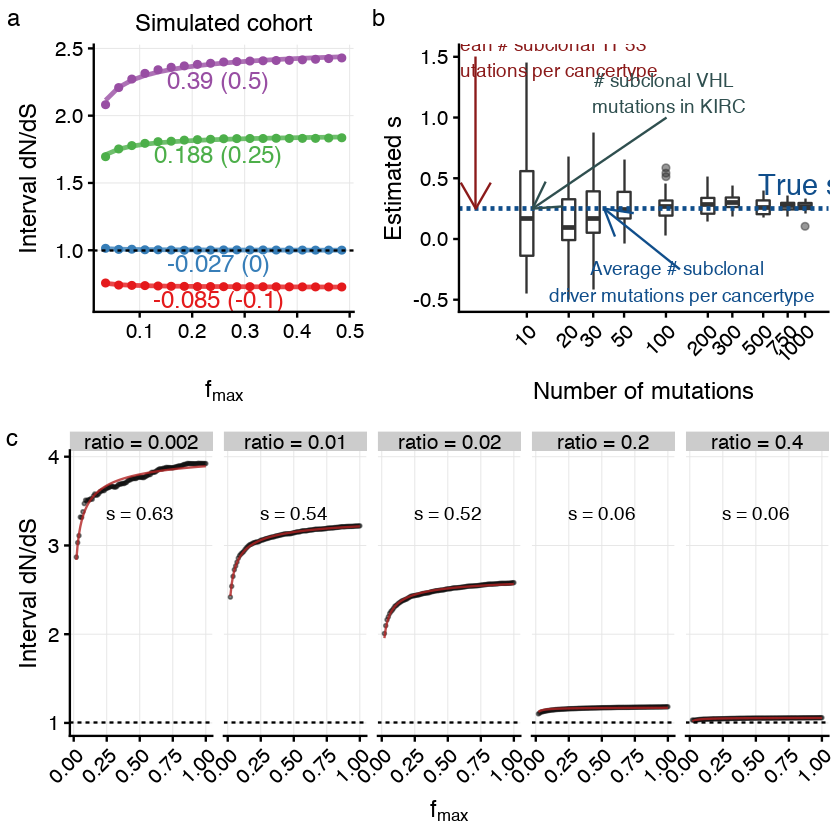

In [279]:
labels <- dfdndsIntSim %>%
    mutate(trues = paste0(trues)) %>%
    group_by(trues, sfit) %>%
    dplyr::summarize(y = 1.0*mean(dnds) -0.1 ) %>%
    mutate(x = 0.25) %>%
    mutate(label = paste0(round(sfit,3), " (", trues,")"))

gsim <- dfdndsIntSim %>%
    mutate(trues = paste0(trues)) %>%
    ggplot2::ggplot(ggplot2::aes(x = CCF, y = dnds, fill = trues, group = trues)) +
    ggplot2::geom_point(aes(col = trues)) +
    ggplot2::geom_line(ggplot2::aes(y = dndsth, col = trues),  size = 1.0, alpha = 0.8) +
    ggplot2::ylab("Interval \n dN/dS") + ggplot2::xlab(expression(f[max])) +
    geom_hline(yintercept = 1.0, lty = 2) +
    xlab(expression(f[max])) +
    ylab("Interval dN/dS") +
    scale_fill_hue(l=40) +
    background_grid(major = "xy", minor = "none") +
    scale_fill_brewer(palette="Set1") +
    scale_colour_brewer(palette="Set1") +
    geom_text(data = labels, aes(x = x, y = y, label = label, col = trues), size = 5) + 
    theme(legend.position="none") +
    ggtitle("Simulated cohort")

tp53 <- mutspergenepercancer %>%
    filter(gene == "TP53") %>%
    group_by(cancertype) %>%
    summarise(n = sum(n)) %>%
    summarise(x = mean(n)) %>%
    pull(x)

VHL <- mutspergenepercancer %>%
    filter(gene == "VHL", cancertype == "KIRC") %>%
    pull(n) %>%
    sum()

nonsense <- mutspergenepercancer %>%
    filter(impact == "Nonsense") %>%
    group_by(cancertype) %>%
    summarise(x = n()) %>%
    summarise(x = mean(x)) %>%
    pull()

missense <- mutspergenepercancer %>%
    filter(impact == "Missense") %>%
    group_by(cancertype) %>%
    summarise(x = n()) %>%
    summarise(x = mean(x)) %>%
    pull(x)

gsummary <- dfplot %>%
    filter(npassengers != 75) %>%
    #mutate(sample = fct_reorder(as.factor(as.character(npassengers)), npassengers)) %>%
    ggplot(aes(y = sfit, x = npassengers)) +
    geom_boxplot(aes(group = npassengers), alpha = 0.5) +
    #geom_sina(col = "plum4", alpha = 0.8, size = 0.7) +
    geom_hline(yintercept = 0.25, lty = 2, col = "dodgerblue4", size = 1.0) +
    annotate("text", x = 900, y = 0.45, label = "True s", col = "dodgerblue4", size = 6) +
    #geom_vline(xintercept = tp53, lty = 2, col = "firebrick4") +
    annotate("text", x = tp53 + 10, y = 1.5, label = "Mean # subclonal TP53 \n mutations per cancertype", 
              col = "firebrick4") +
    annotate("segment", x=tp53,xend=tp53,y=1.5,yend=0.25,arrow=arrow(), color="firebrick4") +
    #geom_vline(xintercept = VHL, lty = 2, col = "darkslategray") +
    annotate("segment", x=VHL + 90,xend=VHL,y=1.0,yend=0.25,arrow=arrow(), color="darkslategray") +
    annotate("text", x = VHL + 90, y = 1.2, label = "# subclonal VHL \n mutations in KIRC", 
              col = "darkslategray") +
    annotate("segment", x=missense + 90,xend=missense,y= -0.25,yend=0.25,arrow=arrow(), color="dodgerblue4") +
    annotate("text", x = missense + 90, y = -0.35, label = "Average # subclonal \n driver mutations per cancertype", 
              col = "dodgerblue4") +
    xlab("Number of mutations") +
    ylab("Estimated s") +
    ylim(c(-0.5, 1.5)) +
    scale_x_log10(breaks = c(10, 20, 30, 50, 100, 200, 300, 500, 750, 1000)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

dfdndsIntmuSim <- read_csv("FinalFigures/data_for_figures/cancer_simulation_diffmu_dnds.csv", col_types = cols())

labels <- dfdndsIntmuSim %>%
    filter(trues == 0.5) %>%
    mutate(trues = paste0("s = ", trues), mud = paste0("ratio = ", mud/0.5)) %>%
    dplyr::group_by(mud, trues) %>%
    dplyr::summarize(s = paste0("s = ", round(first(sfit),2)), A = first(A))

ghitchhike <- dfdndsIntmuSim %>%
    filter(trues == 0.5) %>%
    mutate(trues = paste0("s = ", trues), mud = paste0("ratio = ", mud/0.5)) %>%
    ggplot2::ggplot(ggplot2::aes(x = CCF, y = dnds)) +
    ggplot2::geom_point(col = "grey4", alpha = 0.5, size = 0.5) +
    ggplot2::geom_line(ggplot2::aes(y = dndsth), col = "firebrick",  size = 0.5, alpha = 0.8) +
    ggplot2::ylab("Interval \n dN/dS") + ggplot2::xlab(expression(f[max])) +
    geom_hline(yintercept = 1.0, lty = 2) +
    xlab(expression(f[max])) +
    ylab("Interval dN/dS") +
    background_grid(major = "xy", minor = "none") +
    #scale_color_viridis(option="plasma") + scale_fill_viridis(option="plasma") +
    geom_text(data = labels, aes(x = 0.5, y = Inf, label = s), vjust  = 5) +
    facet_grid(~mud) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

gtemp <- cowplot::plot_grid(gsim, gsummary, ncol = 2, align = T, labels = c("a", "b"), rel_widths = c(1, 1.3))
gInt <- plot_grid(gtemp, ghitchhike, ncol = 1, labels = c("", "c"))
save_plot("FinalFigures/Figure5.pdf", gInt, base_height = 10, base_width = 10)
gInt

In [280]:

gmissInt <- dfdndsInt %>%
    filter(name == "wmis", mutationtype ==  "drivers") %>%
    ggplot(aes(x = MCN, y = mle, ymin = cilow, ymax = cihigh)) +
    geom_point(size = 2, col = "plum4") +
    geom_linerange(col = "plum4") +
    geom_hline(yintercept = 1.0, lty = 2) +
    background_grid(major = "xy", minor = "none") +
    ylab("Interval dN/dS - Missense") + xlab(expression(f[max])) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(c(0.8, 2.0)) +
    ggtitle("TCGA")

gnonInt <- dfdndsInt %>%
    filter(name == "wnon", mutationtype ==  "drivers") %>%
    ggplot(aes(x = MCN, y = mle, ymin = cilow, ymax = cihigh)) +
    geom_point(size = 2, col = "plum4") +
    geom_linerange(col = "plum4") +
    geom_hline(yintercept = 1.0, lty = 2) +
    background_grid(major = "xy", minor = "none") +
    ylab("Interval dN/dS - Nonsense") + xlab(expression(f[max])) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(c(0.8, 5.0)) +
    ggtitle("TCGA")

gInt <- cowplot::plot_grid(gmissInt, gnonInt, ncol = 2, align = T, labels = c("a", "b"))

save_plot("FinalFigures/FigureS8.pdf", gInt, base_height = 3.5, base_width = 7)

Warning message:
“Duplicated aesthetics after name standardisation: alpha”

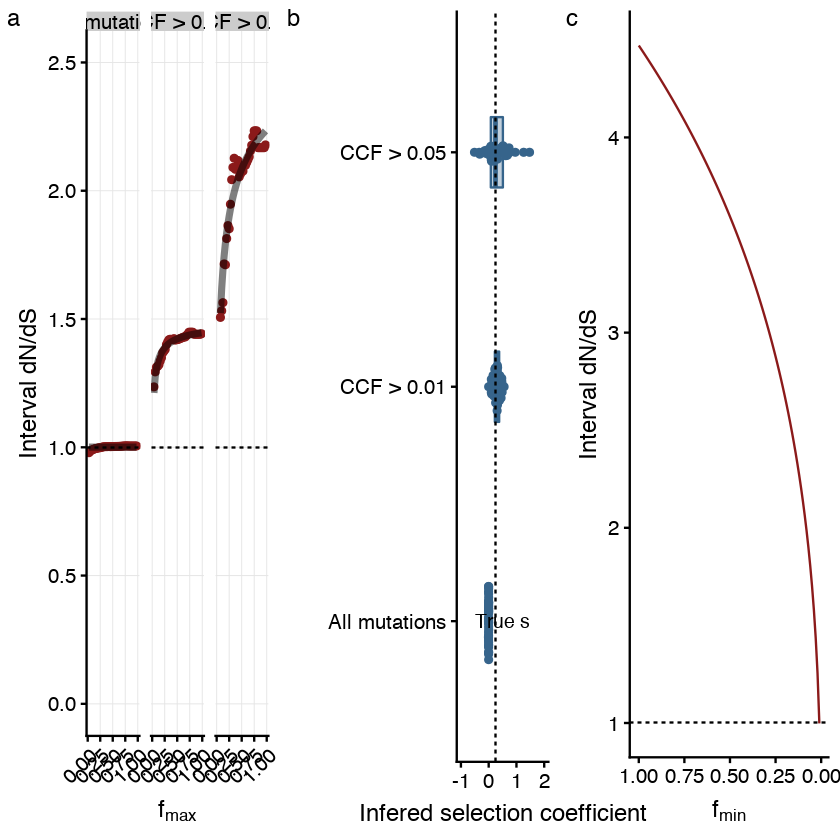

In [281]:
# plot the effect of minimum frequency in dN/dS calculations

dndsfmin <- read_csv("FinalFigures/data_for_figures/cancer_simulation_dnds_fmin.csv", col_types = cols())

inferreds <- read_csv("FinalFigures/data_for_figures/cancer_simulation_dnds_fmin_inferreds.csv", col_types = cols())

g1 <- dndsfmin %>%
    mutate(fminlab = paste0("fmin = ", fmin)) %>%
    mutate(fminlab = case_when(
        fmin == 0.0 ~ "All mutations",
        fmin == 0.01 ~ "CCF > 0.01",
        fmin == 0.05 ~ "CCF > 0.05"
            )
    ) %>%
    filter(simulationset == 3) %>%
    ggplot2::ggplot(ggplot2::aes(x = CCF, y = dnds)) +
    ggplot2::geom_point(col = "firebrick4") +
    ggplot2::geom_line(ggplot2::aes(y = dndsth), alpha = 0.5, size = 1.5, alpha = 0.8) +
    ggplot2::ylab("Interval \n dN/dS") + ggplot2::xlab(expression(f[max])) +
    geom_hline(yintercept = 1.0, lty = 2) +
    xlab(expression(f[max])) +
    ylab("Interval dN/dS") +
    #scale_fill_hue(l=40) +
    background_grid(major = "xy", minor = "none") +
    facet_wrap(~fminlab) + 
    ylim(c(0, 2.5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- inferreds %>%
    mutate(fmin = paste0(fmin)) %>%
    ggplot(aes(x = fmin, y = s)) +
    geom_boxplot(width = 0.3, alpha = 0.3, col = "steelblue4", fill = "steelblue4") +
    geom_sina(col = "steelblue4") +
    ylim(c(-1, 2)) +
    geom_hline(yintercept = 0.25, lty = 2) +
    ylab("Infered selection coefficient") +
    #xlab(expression(f[min])) +
    xlab("") +
    annotate("text", x = "0", y = 0.5, label = "True s", size = 4) +
    scale_x_discrete(labels = c("All mutations", "CCF > 0.01",
                               "CCF > 0.05")) +
    coord_flip()

dndslim <- function(fmin, fmax, N, s){
    a <- N^(s / (1+s))
    b <- gamma((2+s) / (1+s))
    b2 <- (1+s) ^ 2
    c <- fmin ^ (-1 / (1+s)) - fmax ^ (-1 / (1+s))
    d <- (1/fmin) - (1/fmax)
    #print(b)
    
    return(a * (c/d))
}

N <- 100
fmin <- seq(1,N,1) / N
idnds <- dndslim(fmin, N, N, 0.5)

df <- data.frame(fmin = fmin, idnds = idnds)

g3 <- df %>%
    ggplot(aes(x = fmin, y = idnds)) +
    geom_line(col = "firebrick4") +
    scale_x_reverse() +
    xlab(expression(f[min])) +
    ylab("Interval dN/dS") +
    geom_hline(yintercept = 1.0, lty = 2)

g <- plot_grid(g1, g2, g3, ncol = 3, rel_widths = c(1.0, 1), labels = c("a", "b", "c"))
save_plot("FinalFigures/FigureS9.pdf", g, base_height = 3.5, base_width = 14)

g

# Supplementary figure S10

In [282]:
df <- read_csv("FinalFigures/data_for_figures/dNdS_baseline_validate.csv",col_types = cols())

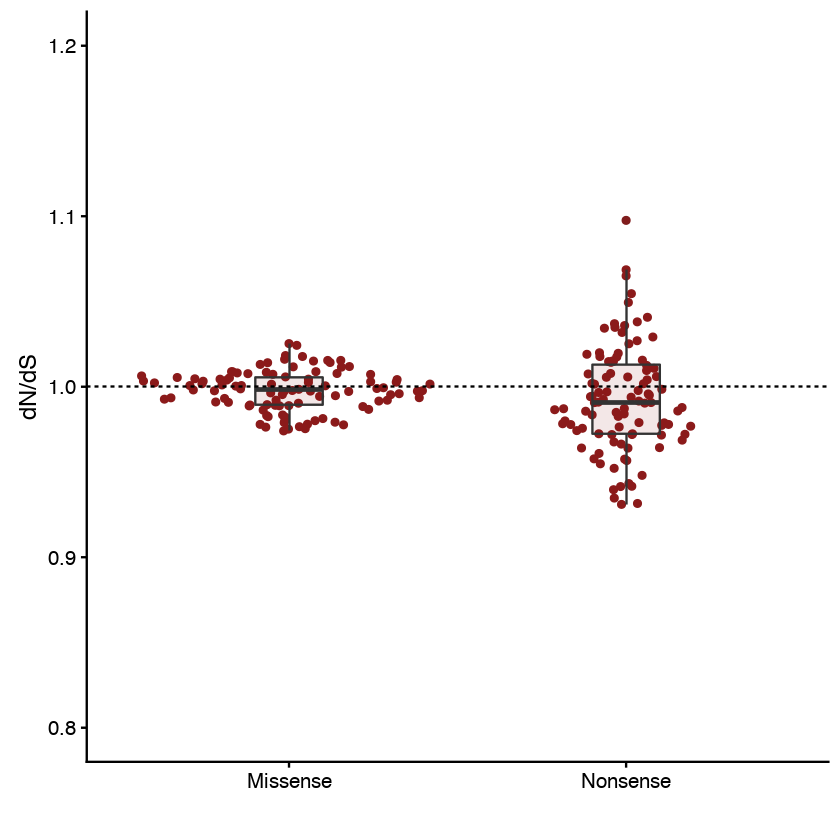

In [283]:
dndsplot <- df %>%
    filter(name == "wmis" | name == "wnon") %>%
    mutate(name = ifelse(name == "wmis", "Missense", "Nonsense")) %>%
    ggplot(aes(x = name, y = mle)) +
    geom_sina(col = "firebrick4") + 
    geom_boxplot(alpha = 0.1, width = 0.2, fill = "firebrick4") +
    geom_hline(yintercept = 1.0, lty = 2) +
    xlab("") +
    ylab("dN/dS") +
    ylim(c(0.8, 1.2))

save_plot("FinalFigures/FigureS10.pdf", dndsplot, base_width = 5, base_height = 5)
dndsplot

In [289]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Sierra 10.12.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_GB.UTF-8/en_GB.UTF-8/en_GB.UTF-8/C/en_GB.UTF-8/en_GB.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  Hmisc_4.1-1     Formula_1.2-3   survival_2.42-3
 [5] lattice_0.20-35 ggforce_0.1.3   jcolors_0.0.4   forcats_0.3.0  
 [9] stringr_1.3.1   dplyr_0.7.7     purrr_0.2.5     readr_1.1.1    
[13] tidyr_0.8.2     tibble_1.4.2    tidyverse_1.2.1 cowplot_0.9.3  
[17] ggplot2_3.1.0  

loaded via a namespace (and not attached):
 [1] httr_1.3.1          jsonlite_1.6        splines_3.5.1      
 [4] modelr_0.1.2        assertthat_0.2.0    latticeExtra_0.6-28
 [7] cellranger_1.1.0    pi